In [160]:
import numpy as np
from IPython.display import clear_output
from tqdm import tqdm_notebook as tqdm
from matplotlib import pyplot as plt
import seaborn as sns
import time

In [138]:
def dist(A, a, b):
    return (np.abs(A.sum(axis=1) - a)).sum() + np.abs(A.sum(axis=0)-b).sum()

In [110]:
def potential(A, x, y, a, b):
    return (np.diag(np.exp(x)) @ A @ np.diag(np.exp(y))).sum() - a @ x - b @ y

In [278]:
def sinkhorn(A, a, b, epsilon):
    k = 0
    factor = np.log(A.sum()/A.min())
    original_A = A.copy()
    A = A.copy()
    n, m = A.shape
    x = np.zeros(n)
    y = np.zeros(m)
    dists = []
    pots = []
    while dist(A, a, b) > epsilon:
        dists.append(dist(A, a, b))
        k += 1
        if k % 2 != 0:
            dx = np.log(a / A.sum(axis=1))
            x = x + dx
        else:
            dy = np.log(b / A.sum(axis=0))
            y = y + dy
        pots.append(potential(original_A, x, y, a, b))
        A = np.diag(np.exp(x)) @ original_A @ np.diag(np.exp(y))
    return np.array(dists), np.array(pots), A, k

In [339]:
d = []
for experiment in tqdm(range(100)):
    n, m = 100, 100
    a = np.random.randn(n) ** 2
    a /= a.sum()
    b = np.random.randn(m) ** 2
    b /= b.sum()
    regularizer = .001
    cost = np.random.randn(n, m) ** 2
    A = np.exp(-cost/regularizer)
    dists, pots, As, k = sinkhorn(A, a, b, 1e-10)
    d.append(dists[1:])

HBox(children=(IntProgress(value=0), HTML(value='')))

/Users/jiafengchen/anaconda3/lib/python3.6/site-packages/ipykernel_launcher.py:3: RuntimeWarning: divide by zero encountered in double_scalars
  This is separate from the ipykernel package so we can avoid doing imports until


Exception in thread Thread-25:
Traceback (most recent call last):
  File "/Users/jiafengchen/anaconda3/lib/python3.6/threading.py", line 916, in _bootstrap_inner
    self.run()
  File "/Users/jiafengchen/anaconda3/lib/python3.6/site-packages/tqdm/_tqdm.py", line 144, in run
    for instance in self.tqdm_cls._instances:
  File "/Users/jiafengchen/anaconda3/lib/python3.6/_weakrefset.py", line 60, in __iter__
    for itemref in self.data:
RuntimeError: Set changed size during iteration



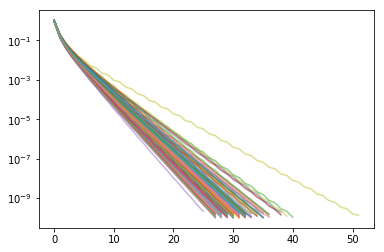

In [337]:
for ds in d:
    plt.plot(ds, '-', alpha=.5)
plt.yscale('log')

Text(0,0.5,'L1 distance between row-column sums and targets')

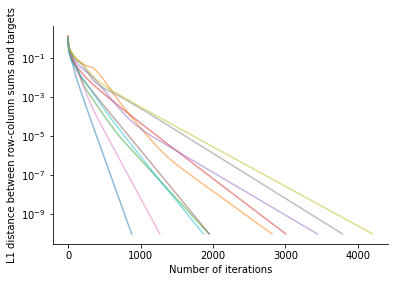

In [363]:
for ds in np.array(d)[np.random.choice(range(len(d)), replace=False, size=10)]:
    plt.plot(ds, '-', alpha=.5)
plt.yscale('log')
sns.despine()
plt.xlabel('Number of iterations')
plt.ylabel('L1 distance between row-column sums and targets')

In [355]:
dists, kl, As, k = sinkhorn(A, a, b, 1e-5)

/Users/jiafengchen/anaconda3/lib/python3.6/site-packages/ipykernel_launcher.py:3: RuntimeWarning: divide by zero encountered in double_scalars
  This is separate from the ipykernel package so we can avoid doing imports until


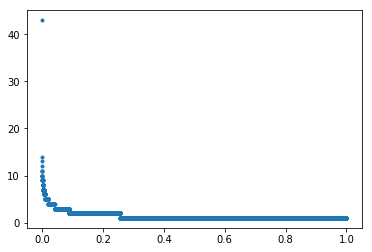

In [281]:
plt.plot(np.linspace(1, 1e-10, 10000), ks, '.')


In [90]:
pots.diff()

AttributeError: 'numpy.ndarray' object has no attribute 'diff'

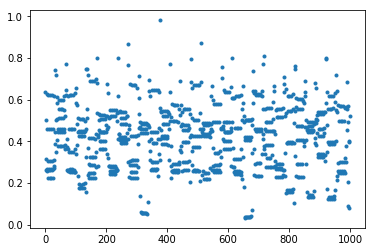

In [134]:
plt.plot(dists[:1000],'.')

In [61]:
32.58673262334614 * 4 * (0.001 ** -2)

130346930.49338455

In [52]:
np.log(A.sum()/A.min())

32.58673262334614

In [62]:
32.58 * 4 * (.001 ** -2)

130320000.0